In [45]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [46]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [47]:
NUM_CLASSES = 10

# Dataset reading

In [48]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [49]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [52]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 42)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                860       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
Total params: 1180 (4.61 KB)
Trainable params: 1180 (4.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [54]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [55]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


30/38 [======================>.......] - ETA: 0s - loss: 2.3235 - accuracy: 0.1297
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 2s 13ms/step - loss: 2.3090 - accuracy: 0.1367 - val_loss: 2.2166 - val_accuracy: 0.2382
Epoch 2/1000
19/38 [==============>...............] - ETA: 0s - loss: 2.2262 - accuracy: 0.1698

c:\Users\Carlos Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 6ms/step - loss: 2.2068 - accuracy: 0.1772 - val_loss: 2.1229 - val_accuracy: 0.2824
Epoch 3/1000
32/38 [========================>.....] - ETA: 0s - loss: 2.1140 - accuracy: 0.2197
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 9ms/step - loss: 2.1134 - accuracy: 0.2206 - val_loss: 2.0227 - val_accuracy: 0.3948
Epoch 4/1000
37/38 [============================>.] - ETA: 0s - loss: 2.0287 - accuracy: 0.2513
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [==============================] - 0s 6ms/step - loss: 2.0287 - accuracy: 0.2511 - val_loss: 1.9356 - val_accuracy: 0.4081
Epoch 5/1000
28/38 [=====================>........] - ETA: 0s - loss: 1.9721 - accuracy: 0.2748
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
38/38 [=============

In [56]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 4ms/step - loss: 0.5861 - accuracy: 0.8484


In [57]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [58]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 118ms/step
[2.5631796e-04 1.5331456e-01 8.3213550e-01 4.8947695e-04 1.3093520e-05
 2.8915438e-03 9.9848199e-04 1.8306839e-05 9.8826913e-03 3.8205574e-08]
2


# Confusion matrix

50/50 [==============================] - 0s 4ms/step


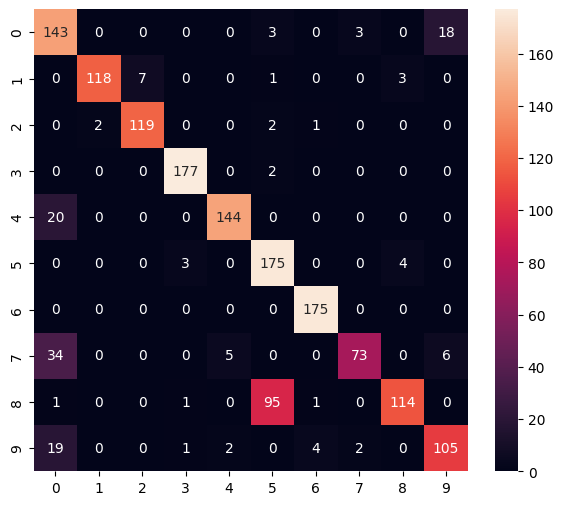

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.86      0.74       167
           1       0.98      0.91      0.95       129
           2       0.94      0.96      0.95       124
           3       0.97      0.99      0.98       179
           4       0.95      0.88      0.91       164
           5       0.63      0.96      0.76       182
           6       0.97      1.00      0.98       175
           7       0.94      0.62      0.74       118
           8       0.94      0.54      0.68       212
           9       0.81      0.79      0.80       133

    accuracy                           0.85      1583
   macro avg       0.88      0.85      0.85      1583
weighted avg       0.88      0.85      0.85      1583



In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [60]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\Users\Carlos Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\CARLOS~1\AppData\Local\Temp\tmpxtkxbk9x\assets


INFO:tensorflow:Assets written to: C:\Users\CARLOS~1\AppData\Local\Temp\tmpxtkxbk9x\assets


6836

# Inference test

In [62]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [63]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [64]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [65]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [66]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.5631816e-04 1.5331456e-01 8.3213538e-01 4.8947620e-04 1.3093516e-05
 2.8915447e-03 9.9848234e-04 1.8306837e-05 9.8826913e-03 3.8205570e-08]
2
